
# Binary Classification with Tensorflow 

We'll use the Bank Authentication Data Set from the UCI repository.

The data consists of 5 columns:

- variance of Wavelet Transformed image (continuous)
- skewness of Wavelet Transformed image (continuous)
- curtosis of Wavelet Transformed image (continuous)
- entropy of image (continuous)
- class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

### **Get the Data**

**Use pandas to read in the bank_note_data.csv file**


In [58]:
import numpy as np
import pandas as pd

In [59]:
df = pd.read_csv('bank_note_data.csv')

**Check the head of the Data**

In [60]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0



### **EDA**

We'll just do a few quick plots of the data.

**Import seaborn and set matplolib inline for viewing**


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

**Create a Countplot of the Classes (Authentic 1 vs Fake 0)**

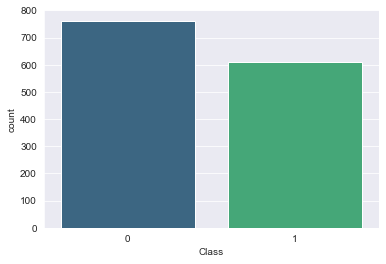

In [62]:


sns.countplot(x = 'Class', data = df, palette = 'viridis')



**Create a Scaterplot of the Data with MatplotLib **

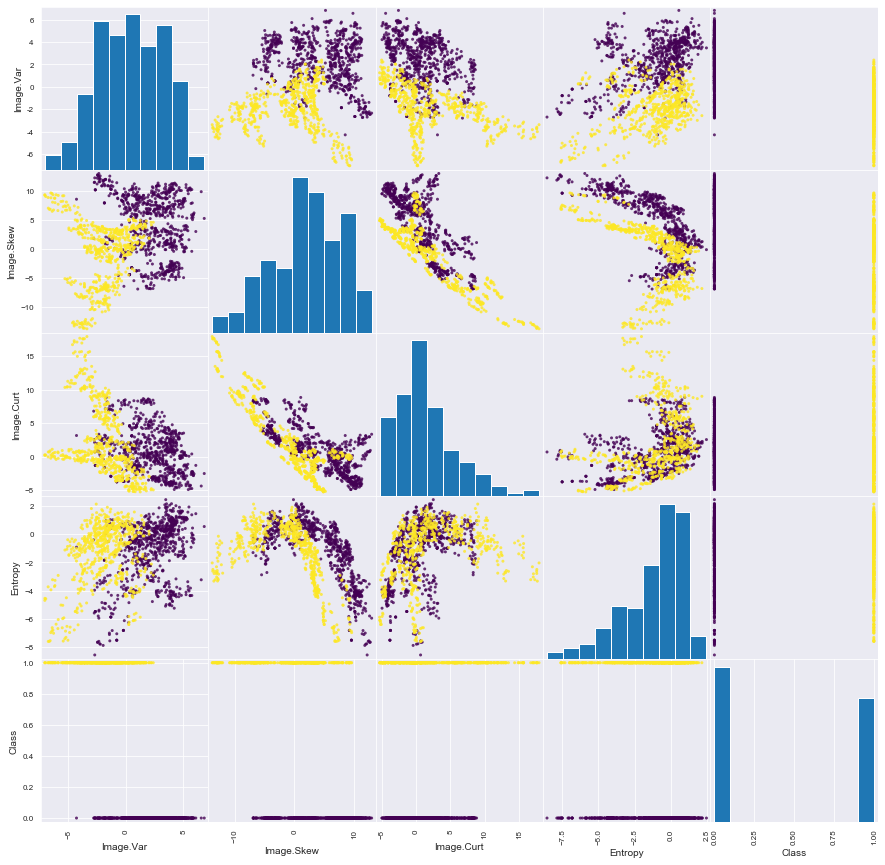

In [63]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.8,figsize=(15,15), c = df['Class'],cmap = 'viridis');


## **Data Preparation**

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### **Standard Scaling**

**Import StandardScaler() from SciKit Learn**


In [64]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**


In [65]:
sc = StandardScaler()

**Fit scaler to the features.**


In [66]:
sc.fit(X = df.drop('Class', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**


In [67]:
scaled_data = sc.transform(X = df.drop('Class', axis = 1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**


In [68]:
df_scaled = pd.DataFrame(data = scaled_data, columns = df.columns[:-1] ) 

In [69]:
df_scaled.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## **Train Test Split**

**Create two objects X and y which are the scaled feature values and labels respectively.**


In [70]:
X = df_scaled
y = df['Class']


**Use the .values method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series.**


In [17]:


#X = X.values
#y = y.values



In [38]:
y

array([0, 0, 0, ..., 1, 1, 1])


**Use SciKit Learn to create training and testing sets of the data keeping 30% of data for test. Convert the ones in the categoriies to np.int32**


In [71]:
from sklearn.model_selection import train_test_split

In [72]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
#y_test  = (y_test==1).astype(np.int32)
#y_train = (y_train==1).astype(np.int32)


y_test  = y_test.astype(np.int32)
y_train = y_train.astype(np.int32)

In [73]:
X_train

,Image.Var,Image.Skew,Image.Curt,Entropy
77,-0.135326,0.719518,0.089399,0.224034
1072,-0.633325,-0.296271,-0.114249,1.319967
50,1.368944,-1.160041,0.473017,0.292373
122,-0.665418,1.227060,0.080046,-1.872372
930,-0.934339,-0.368223,-0.194396,0.594062
...,...,...,...,...
973,0.280521,0.335773,-1.444908,-1.340434
75,0.659059,0.275110,-0.190815,0.767070
599,1.230050,-0.824617,0.189226,0.714119
1361,-0.706238,-0.146372,-0.489722,0.168007



## **Keras**

We're going to build a sequential model w/ three hidden layers w/ [10,20,10] structure, binary output class, and train it with 30 epochs w/ a batch size of 20.


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [75]:
# A sequential model where we stack layers on top of each other
model = Sequential()



In [76]:
# Stack 3 hidden layers and 1 output layer
model.add(Dense(units = 10, activation='relu', input_shape=(4,)))
model.add(Dense(units = 20, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))



In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_17 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


**Let's use 'adam' as optimizer.**

In [78]:
# Now compile the method.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [79]:
# Now fit the model
model.fit(X_train, y_train, epochs = 30, batch_size = 20, validation_data=(X_test,y_test))

Train on 960 samples, validate on 412 samples
Epoch 1/30
960/960 [==============================] - 1s 1ms/sample - loss: 0.6061 - acc: 0.6812 - val_loss: 0.5096 - val_acc: 0.8714
Epoch 2/30
960/960 [==============================] - 0s 151us/sample - loss: 0.4409 - acc: 0.8990 - val_loss: 0.3581 - val_acc: 0.9029
Epoch 3/30
960/960 [==============================] - 0s 146us/sample - loss: 0.3004 - acc: 0.9260 - val_loss: 0.2323 - val_acc: 0.9417
Epoch 4/30
960/960 [==============================] - 0s 143us/sample - loss: 0.1909 - acc: 0.9479 - val_loss: 0.1399 - val_acc: 0.9587
Epoch 5/30
960/960 [==============================] - 0s 140us/sample - loss: 0.1191 - acc: 0.9677 - val_loss: 0.0833 - val_acc: 0.9806
Epoch 6/30
960/960 [==============================] - 0s 146us/sample - loss: 0.0776 - acc: 0.9750 - val_loss: 0.0540 - val_acc: 0.9830
Epoch 7/30
960/960 [==============================] - 0s 148us/sample - loss: 0.0547 - acc: 0.9792 - val_loss: 0.0379 - val_acc: 0.9879
Epoc

## **Model Evaluation**

**Use the predict method from the classifier model to create predictions from X_test**

**Now create a classification report and a Confusion Matrix. Does anything stand out to you?**


In [54]:
y_predict = model.predict_classes(X_test)

In [57]:
model.predict(X_test)

array([[3.87430191e-07],
       [1.31130219e-06],
       [9.99654591e-01],
       [2.70813704e-04],
       [5.66244125e-07],
       [2.08616257e-07],
       [9.03010368e-06],
       [5.69224358e-06],
       [7.89761543e-06],
       [6.85453415e-06],
       [1.68681145e-05],
       [1.01327896e-06],
       [9.99279618e-01],
       [1.21563673e-04],
       [9.99998331e-01],
       [9.97847915e-01],
       [9.99987841e-01],
       [9.99696136e-01],
       [5.96046448e-08],
       [9.99977708e-01],
       [6.25848770e-07],
       [7.80820847e-06],
       [8.34465027e-07],
       [9.99973416e-01],
       [9.99984741e-01],
       [9.99996424e-01],
       [1.93715096e-06],
       [1.99913979e-04],
       [9.99950230e-01],
       [1.60932541e-06],
       [4.76837158e-07],
       [9.99985933e-01],
       [2.08616257e-07],
       [6.24060631e-05],
       [2.23517418e-06],
       [8.94069672e-08],
       [9.99694347e-01],
       [0.00000000e+00],
       [9.99939919e-01],
       [9.99563694e-01],


In [55]:
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
print(confusion_matrix(y_test,y_predict))

[[238   0]
 [  0 174]]


In [36]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412




## **Models Comparison**

You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!

Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model


**It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN!**
